In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [57]:
train = pd.read_csv('./regression_train.csv')
test = pd.read_csv('./regression_test.csv')
merge = pd.concat([train, test])

In [58]:
train.head()

,y,1,2,3,4,5,6,7,8,9,10,11,12
0,90,6,2,1036,103,114,1.00,1.00,172076,355965,2.0,6527,1851864
1,88,1,0,2165,205,101,0.40,1.20,43107,44139,3.0,130,1131931
2,85,62,77,3806,258,166,1.40,1.40,492142,268706,5.2,256,1314590
3,81,5,0,4721,256,177,0.99,2.58,524787,174964,1.0,233,972606
4,79,42,55,3949,249,244,2.60,4.60,197289,529200,3.4,331,1013805


In [59]:
train.describe()

,y,1,2,3,4,5,6,7,8,9,10,11,12
count,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5.885000e+03,5.885000e+03,5885.000000,5885.000000,5.885000e+03
mean,83.882243,18.482923,12.758369,2317.068649,209.980799,149.201869,1.910194,2.832087,1.966200e+05,9.465236e+04,20.375412,1773.934919,1.329557e+06
std,18.503814,43.389243,28.283702,1649.238358,184.784991,142.088398,2.529381,5.314881,2.405632e+05,1.385465e+05,132.611086,2486.094990,4.238756e+05
min,0.000000,0.000000,0.000000,125.000000,6.000000,7.000000,0.000000,0.000000,4.160000e+02,1.498000e+03,1.000000,55.000000,2.000000e+00
25%,81.000000,2.000000,0.000000,998.000000,85.000000,62.000000,0.400000,0.200000,3.439000e+04,2.288400e+04,1.200000,232.000000,1.042893e+06
50%,89.000000,7.000000,1.000000,2057.000000,166.000000,117.000000,0.800000,1.200000,1.234760e+05,4.666500e+04,2.000000,579.000000,1.293494e+06
75%,94.000000,19.000000,10.000000,3346.000000,280.000000,186.000000,2.400000,2.800000,2.653190e+05,1.053070e+05,3.000000,2029.000000,1.732208e+06
max,99.000000,825.000000,543.000000,12493.000000,2503.000000,2485.000000,20.120000,59.560000,2.526649e+06,1.801623e+06,2823.000000,12012.000000,1.892571e+06


<font color=#DC143C size=4>发现特征10的std跟mean差也差不多十倍，这个特征应该有特别之处,我们来看看到底有什么特别</font>

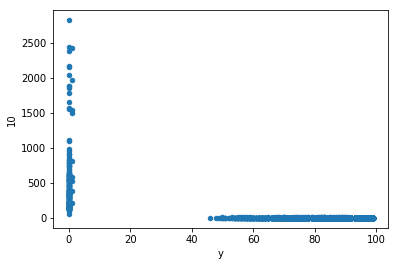

In [60]:
train.plot('y', '10', 'scatter')

<font color=#DC143C size=4>可以看到，上图y=0附近的时候特征10的值都比较大</font>

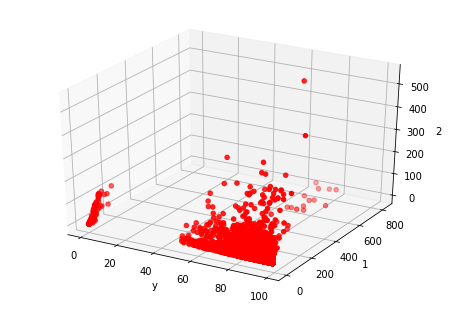

In [61]:
fig = plt.figure()
ax = Axes3D(fig)
# ax.plot_surface(train.loc[:, 'y'], train.loc[:, '1'], train.loc[:, '2'], rstride=1, cstride=1, cmap='rainbow')
ax.scatter(train.loc[:, 'y'], train.loc[:, '1'], train.loc[:, '2'], c='r')

ax.set_xlabel('y')
ax.set_ylabel('1')
ax.set_zlabel('2')

plt.show()

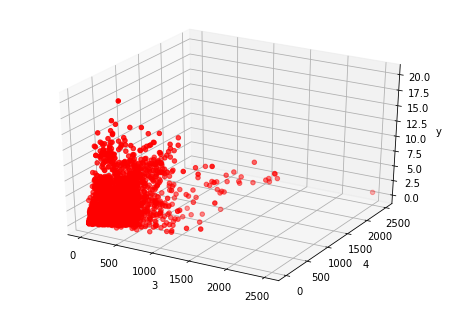

In [62]:
fig = plt.figure()
ax = Axes3D(fig)
# ax.plot_surface(train.loc[:, 'y'], train.loc[:, '1'], train.loc[:, '2'], rstride=1, cstride=1, cmap='rainbow')
ax.scatter(train.loc[:, '4'], train.loc[:, '5'], train.loc[:, '6'], c='r')

ax.set_xlabel('4')
ax.set_ylabel('5')
ax.set_zlabel('6')

plt.show()

In [65]:
tmptrain = train[train['y']>1]
tmptrain.head()

,y,1,2,3,4,5,6,7,8,9,10,11,12
0,90,6,2,1036,103,114,1.00,1.00,172076,355965,2.0,6527,1851864
1,88,1,0,2165,205,101,0.40,1.20,43107,44139,3.0,130,1131931
2,85,62,77,3806,258,166,1.40,1.40,492142,268706,5.2,256,1314590
3,81,5,0,4721,256,177,0.99,2.58,524787,174964,1.0,233,972606
4,79,42,55,3949,249,244,2.60,4.60,197289,529200,3.4,331,1013805


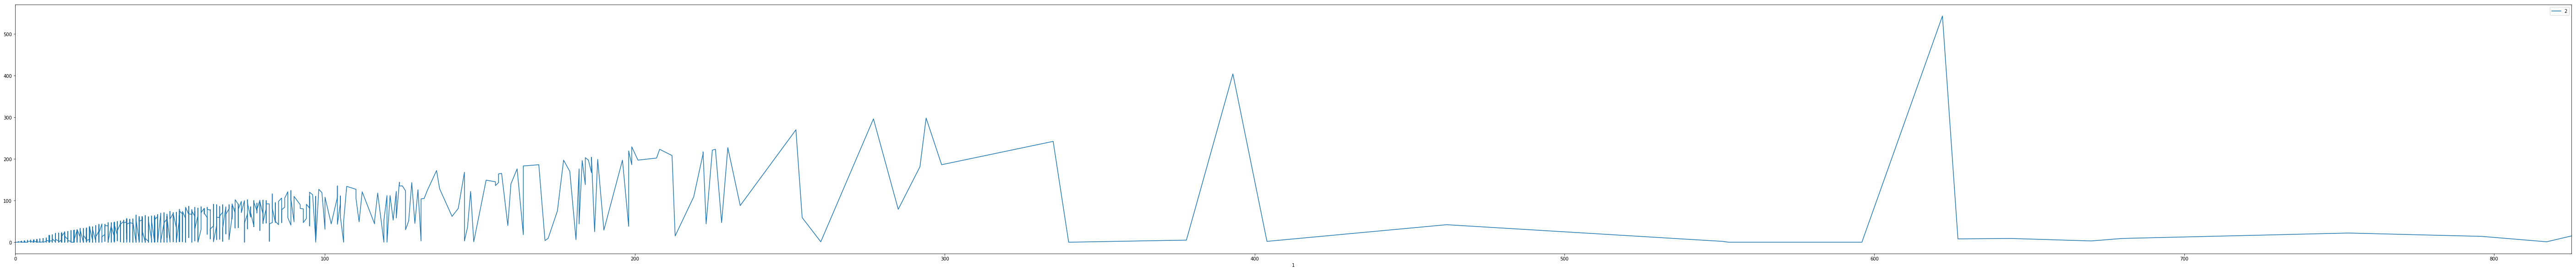

In [82]:
tmptrain.sort_values('1').plot('1', '2', 'line', figsize=(100,10))